# Εργασία 1

## B. Αναγνώριση τύπων γυαλιού με βάση τη χημική τους σύσταση

### 1. Προετοιμασία των δεδομένων

Σκοπός της εργασίας είναι η αξιολόγηση μοντέλων τα οποία κατηγοριοποιούν μετρήσεις διαφόρων χημικών στοιχείων σε 6 τύπους γυαλιού. Τα δεδομένα αυτά είχαν συγκεντρωθεί με σκοπό να μπορεί να αναγνωριστεί ο τύπος του γυαλιού όταν αυτό συλλέγεται από τόπους εγκλήματος έτσι ωστέ να μπορεί να χρησιμοποιηθεί ως αποδεικτικό στοιχείο.


Παρακάτω βλέπουμε τις εκδόσεις της python και των βιβλιοθηκών που χρησιμοποιήθηκαν στην εργασία.

In [1]:
import matplotlib
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn
import sys

np.random.seed(0)

print('Python version:', sys.version)
print('scikit-learn version:', sklearn.__version__)
print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)
print('matplotlib version:', matplotlib.__version__)
print('seaborn version:', sns.__version__)

Python version: 3.7.9 (default, Aug 31 2020, 17:10:11) [MSC v.1916 64 bit (AMD64)]
scikit-learn version: 0.23.2
pandas version: 1.1.3
numpy version: 1.19.2
matplotlib version: 3.3.2
seaborn version: 0.11.0


Τα δεδομένα βρίσκονται στο αρχείο glass.data τα οποία διαβάζονται και αποθηκεύονται σε ένα pandas dataframe.

In [2]:
import numpy as np
import urllib.request
import os

np.random.seed(0)

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data'
filename = 'glass.data'

if not os.path.exists(filename):
    print('Downloading file...')
    urllib.request.urlretrieve(url, filename)
    print('Done.')

names = ("Id", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "Type")
df = pd.read_csv(filename, names=names)

Παρακάτω βλέπουμε τα 5 πρώτα παραδείγματα.

In [3]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Ακολουθεί περιγραφή των διαφόρων χαρακτηριστικών.

In [4]:
%%html
<style>
table {float:left}
</style>

|Id|Attribute|Description|
|:-|:-|:-|
|1|Id| Id number: 1 to 214|
|2|RI|refractive index
|3|Na|Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
|4|Mg|Magnesium
|5|Al|Aluminum
|6|Si|Silicon
|7|K|Potassium
|8|Ca|Calcium
|9|Ba|Barium
|10|Fe|Iron
|11|Type|Type of glass: (class attribute)

Ακολουθεί περιγραφή των κλάσεων. Η 4η κλάση δεν χρησιμοποιείται.

|Class|Description|
|:-|:-|
|1|building_windows_float_processed
|2|building_windows_non_float_processed
|3|vehicle_windows_float_processed
|4|vehicle_windows_non_float_processed (none in this database)
|5|containers
|6|tableware
|7|headlamps

Όλα τα χαρακτηριστικά είναι πραγματικοί αριθμοί εκτός από το Id και τη μεταβλητή στόχο Type οι οποίοι είναι ακέραιοι. Παρατηρούμε ότι δεν υπάρχουν τιμές που λείπουν.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


Βγάζουμε εκτός του dataframe το Id γιατί είναι απλώς ένας αύξων αριθμός και δεν προσφέρει κάποια χρήσιμη πληροφορία για την κατηγοριοποίηση

In [6]:
df.drop(labels='Id', axis=1, inplace=True)

Το παρακάτω ιστόγραμμα μας δείχνει ότι οι κλάσεις των ψηφίων δεν είναι ζυγισμένες. 

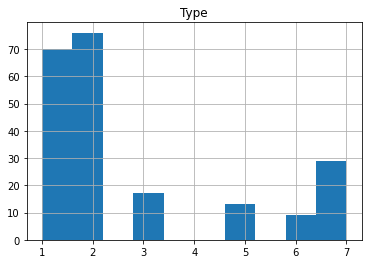

In [7]:
import matplotlib.pyplot as plt

df.hist(column='Type')
plt.show()

To dataset χωρίζεται σε train set (60%) και test set (40%) χρησιμοποιώντας την συνάρτηση StratifiedShuffleSplit η οποία μας εξασφαλίζει οτι η κατανομή στα δυο set θα είναι ίδια ως προς τη μεταβλητή στόχο.

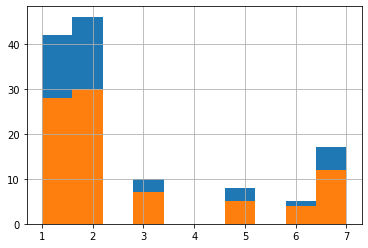

In [8]:
from sklearn import model_selection

split = model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=0)

for train_index, test_index in split.split(df, df['Type']):
    df_train = df.loc[train_index]
    df_test = df.loc[test_index]

df_train_x = df_train.drop('Type', axis=1)
df_train_y = df_train['Type']
df_test_x = df_test.drop('Type', axis=1)
df_test_y = df_test['Type']
    
df_train_y.hist()
df_test_y.hist()
plt.show()

Παρακάτω βλέπουμε κάποια στατιστικά δεδομένα για τις ανέξαρτητες μεταβλητές και την εξαρτημένη μεταβλητή Type.

In [9]:
df_train.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,128.000000,128.000000,128.00000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,1.518346,13.347344,2.63375,1.434531,72.693672,0.532500,9.016641,0.159531,0.057656,2.757812
std,0.003189,0.792129,1.46517,0.494346,0.832269,0.791642,1.401949,0.503831,0.096330,2.091400
min,1.511150,10.730000,0.00000,0.340000,69.810000,0.000000,6.470000,0.000000,0.000000,1.000000
25%,1.516525,12.885000,1.83250,1.190000,72.330000,0.137500,8.317500,0.000000,0.000000,1.000000
50%,1.517720,13.210000,3.45500,1.335000,72.845000,0.560000,8.605000,0.000000,0.000000,2.000000
75%,1.518985,13.702500,3.58250,1.620000,73.102500,0.600000,9.200000,0.000000,0.102500,3.000000
max,1.533930,17.380000,4.49000,3.040000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Ακολουθούν ιστογράμματα των χαρακτηριστικών και το scatter matrix.

[]

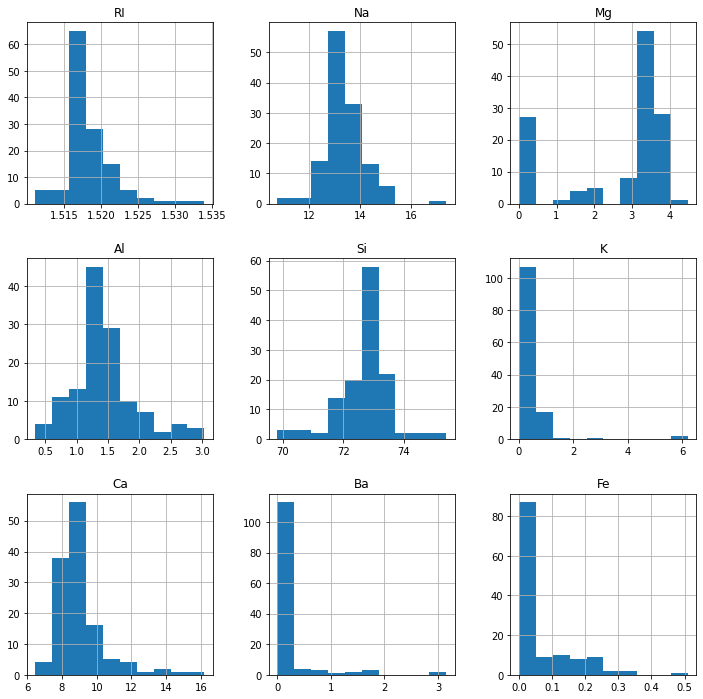

In [10]:
df_train_x.hist(figsize=(12, 12))
plt.plot()

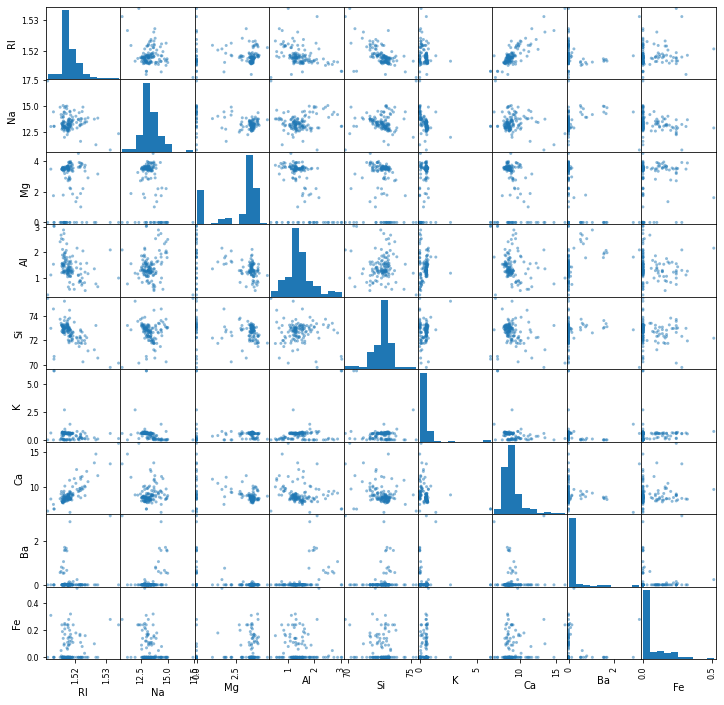

In [11]:
pd.plotting.scatter_matrix(df_train_x, figsize=(12, 12))
plt.show()

Το train set και το test set αποθηκεύονται σε numpy arrays.

In [12]:
x_train = df_train_x.to_numpy()
y_train = df_train_y.to_numpy()
x_test = df_test_x.to_numpy()
y_test = df_test_y.to_numpy()

print('x_train.shape =', x_train.shape)
print('y_train.shape =', y_train.shape)
print('x_test.shape =', x_test.shape)
print('y_test.shape =', y_test.shape)

x_train.shape = (128, 9)
y_train.shape = (128,)
x_test.shape = (86, 9)
y_test.shape = (86,)


### 2. Μείωση διαστάσεων

Εφαρμόζεται κανονικοποίηση και μείωση των διαστάσεων με την τεχνική PCA διατηρώντας το 90% της διασποράς.

In [13]:
from sklearn import decomposition
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

pca = decomposition.PCA(n_components=0.9, svd_solver='full', random_state=0)
x_train_reduced = pca.fit_transform(x_train_scaled)

print('x_train.shape', x_train.shape)
print('x_train_reduced.shape =', x_train_reduced.shape)

x_train.shape (128, 9)
x_train_reduced.shape = (128, 5)


Η διαδικάσια αυτή γίνεται μόνο για την απεικόνιση των παραδειγμάτων στο επίπεδο των δυο πρώτων ιδιοδιανυσμάτων. Αργότερα εφαρμόζεται μέσω pipeline.

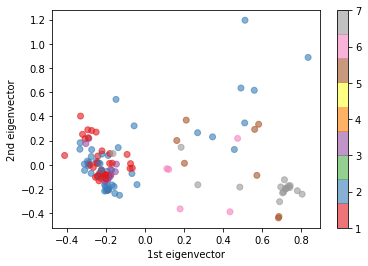

In [14]:
plt.scatter(x_train_reduced[:, 0], x_train_reduced[:, 1], c=y_train, cmap='Set1', alpha=0.6)
plt.xlabel('1st eigenvector')
plt.ylabel('2nd eigenvector')
plt.colorbar()
plt.show()

### 3. Αξιολόγηση μοντέλων

#### 3.1 Περιγραφή της διαδικασίας

Επιλέγεται να γίνει αξιολόγηση των μοντέλων για την αναζήτηση των βέλτιστων παραμέτρων με την τεχνική της διασταυρωμένης επικύρωσης επειδή τα παραδείγματα είναι λίγα. Για την αξιολόγηση επιλέγεται η μετρική F1 επειδή οι κλάσεις δεν είναι ζυγισμένες. Η συνάρτηση GridSearchCV εφαρμόζει k-fold cross-validation με k=5 και stratified shuffle split. Μετά απο κάθε split εφαρμόζεται κανονικοποίηση με τον MinMaxScaler, PCA και εκπαίδευση του μοντέλου. Αυτά τα 3 βήματα ομαδοποιούνται σε ένα pipeline. Όταν τελειώσει η διαδικασία του grid search δημιουργείται ένα διάγραμμα για το πώς αλλάζει το μέσο F1 ($\pm$std) στο train set και στο validation set καθώς αλλάζει μια παράμετρος και ένα αντίστοιχο διάγραμμα για τον χρόνο εκπαίδευσης. Στο τέλος εκπαιδεύεται το βέλτιστο μοντέλο εκ νέου σε ολόκληρο το train set και αξιολογείται στο test set.

In [15]:
def plot_grid_search(search, baseline_score_val, param1, param2=None, xscale='linear'):
    param1_key = 'model__' + param1
    
    if param2 is None:
        x = [x['model__' + param1] for x in search.cv_results_['params']]  
        mean_train_score = search.cv_results_['mean_train_score']
        mean_test_score = search.cv_results_['mean_test_score']
        mean_fit_time = search.cv_results_['mean_fit_time']
        std_train_score = search.cv_results_['std_train_score']
        std_test_score = search.cv_results_['std_test_score']
        std_fit_time = search.cv_results_['std_fit_time']
    else:
        param2_key = 'model__' + param2
        x = []
        mean_train_score = []
        mean_test_score = []
        mean_fit_time = []
        std_train_score = []
        std_test_score = []
        std_fit_time = []
        val2 = search.best_params_[param2_key]
        all_mean_train_score = search.cv_results_['mean_train_score']
        all_mean_test_score = search.cv_results_['mean_test_score']
        all_mean_fit_time = search.cv_results_['mean_fit_time']
        all_std_train_score = search.cv_results_['std_train_score']
        all_std_test_score = search.cv_results_['std_test_score']
        all_std_fit_time = search.cv_results_['std_fit_time']
        
        for i, params in enumerate(search.cv_results_['params']):
            if params[param2_key] == val2:
                x.append(params[param1_key])
                mean_train_score.append(all_mean_train_score[i])
                mean_test_score.append(all_mean_test_score[i])
                mean_fit_time.append(all_mean_fit_time[i])
                std_train_score.append(all_std_train_score[i])
                std_test_score.append(all_std_test_score[i])
                std_fit_time.append(all_std_fit_time[i])
                
        mean_train_score = np.array(mean_train_score)
        mean_test_score = np.array(mean_test_score)
        mean_fit_time = np.array(mean_fit_time)
        std_train_score = np.array(std_train_score)
        std_test_score = np.array(std_test_score)
        std_fit_time = np.array(std_fit_time)
    
    baseline_score = np.full(len(x), baseline_score_val)
    
    if param2 is None:
        plt.title('Score')
    else:
        if val2 is isinstance(val2, float):
            plt.title('Score for ' + param2 + ' = ' + "{:.4f}".format(val2))
        else:
            plt.title('Score for ' + param2 + ' = ' + str(val2))
    plt.plot(x, mean_train_score, label='Train')
    plt.fill_between(x, mean_train_score-std_train_score, mean_train_score+std_train_score, alpha=0.2)
    plt.plot(x, mean_test_score, label='Validation')
    plt.fill_between(x, mean_test_score-std_test_score, mean_test_score+std_test_score, alpha=0.2)
    plt.plot(x, baseline_score, label='Baseline', linestyle='dotted')
    plt.xscale(xscale)
    plt.xlabel(param1)
    plt.ylabel('F1')
    plt.legend()
    plt.show()
    
    plt.title('Training time')
    plt.plot(x, mean_fit_time)
    plt.fill_between(x, mean_fit_time-std_fit_time, mean_fit_time+std_fit_time, alpha=0.2)
    plt.xscale('log')
    plt.xlabel(param1)
    plt.ylabel('Time (sec)')
    plt.show()

In [16]:
final_results = []

def evaluate_model(search, classifier_str):
    y_pred = search.predict(x_test)
    y_train_pred = search.predict(x_train)
    
    train_f1 = metrics.f1_score(y_train, y_train_pred, average='micro')
    test_f1 = metrics.f1_score(y_test, y_pred, average='micro')

    print('Training time = {} sec'.format(search.refit_time_))
    print('Accuracy =', metrics.accuracy_score(y_test, y_pred))
    print('Precision =', metrics.precision_score(y_test, y_pred, average='micro'))
    print('Recall =', metrics.recall_score(y_test, y_pred, average='micro'))
    print('F1 =', test_f1)
    print('Train F1 =', train_f1)
    
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred, labels=range(1, 8))
    labels = [str(x) for x in range(1, 8)]
    sns.heatmap(confusion_matrix, cmap="Oranges", annot=True,
               xticklabels=labels, yticklabels=labels)
    plt.title('Confusion matrix')
    plt.show()
    
    correct_indices = np.where(y_test == y_pred)[0]
    incorrect_indices = np.where(y_test != y_pred)[0]
    
    for i in correct_indices[:1]:
        print('Example of correct classification (y_pred = {}, y_test = {})'.format(y_pred[i], y_test[i]))
        print(df_test_x.iloc[i])
    print()
    for i in incorrect_indices[:1]:
        print('Example of misclassification (y_pred = {}, y_test = {})'.format(y_pred[i], y_test[i]))
        print(df_test_x.iloc[i])
    
    best_params_str = ''
    for param, value in search.best_params_.items():
        if best_params_str != '':
            best_params_str += ', '
        if param.startswith('model__'):
            best_params_str += param[len('model__'):]
        else:
            best_params_str += param
        best_params_str += ' = '
        if isinstance(value, float):
            best_params_str += '{:.4f}'.format(value)
        else:
            best_params_str += str(value)
    
    res = {
        'Classifier': classifier_str,
        'Parameters': best_params_str,
        'Train F1': "{:.4f}".format(train_f1),
        'Test F1': "{:.4f}".format(test_f1),
        'Training Time (sec)': "{:.4f}".format(search.refit_time_)
    }
    final_results.append(res)

#### 3.2 Dummy Classifier

Ο Dummy Classifier χρησιμοποίεται ως ένα απλό baseline για τη σύγκριση με τα άλλα μοντέλα. Επιλέγει πάντα την πιο συχνή ετικέτα στο train set.

In [17]:
from sklearn import dummy
from sklearn import metrics
from sklearn import pipeline
from time import time

model = dummy.DummyClassifier(strategy='most_frequent', random_state=0)
pipe = pipeline.Pipeline([('scaler', scaler), ('pca', pca), ('model', model)])

t1 = time()
pipe.fit(x_train, y_train)
t2 = time()
y_pred = pipe.predict(x_test)
y_train_pred = pipe.predict(x_train)

train_f1 = metrics.f1_score(y_train, y_train_pred, average='micro')
dummy_f1 = metrics.f1_score(y_test, y_pred, average='micro')

print('Training time = {} sec'.format(t2 - t1))
print('Accuracy =', metrics.accuracy_score(y_test, y_pred))
print('Precision =', metrics.precision_score(y_test, y_pred, average='micro'))
print('Recall =', metrics.recall_score(y_test, y_pred, average='micro'))
print('F1 =', dummy_f1)
print('Train F1 =', train_f1)

res = {
    'Classifier': 'Dummy Classifier',
    'Parameters': "strategy = 'most_frequent'",
    'Train F1': "{:.4f}".format(train_f1),
    'Test F1': "{:.4f}".format(dummy_f1),
    'Training Time (sec)': "{:.4f}".format(t2 - t1)
}
final_results.append(res)

Training time = 0.001994609832763672 sec
Accuracy = 0.3488372093023256
Precision = 0.3488372093023256
Recall = 0.3488372093023256
F1 = 0.3488372093023256
Train F1 = 0.359375


#### 3.3 Linear SVM

Ακολουθεί βελτιστοποίηση του SVM classifier με linear kernel ως προς την παράμετρο C. Το C είναι η παράμετρος αντιστάθμισης μεταξύ της προσπάθειας για μέγιστο περιθώριο μεταξύ των κλάσεων και για ελάχιστο αριθμό λαθών.

$ Loss = \mathbf{w}^T\mathbf{w} + C\sum_{k=1}^R\varepsilon_{k}\ $

Kernel: $ K(\mathbf{x}, \mathbf{x}') = \langle\mathbf{x},\mathbf{x}'\rangle $

In [18]:
from sklearn import svm

model = svm.SVC(kernel='linear')
pipe = pipeline.Pipeline([('scaler', scaler), ('pca', pca), ('model', model)])

param_grid = {
    'model__C': np.logspace(-3, 3)
}

search = model_selection.GridSearchCV(pipe, param_grid, n_jobs=-1, scoring='f1_micro', return_train_score=True)
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

Best F1 = 0.5861538461538462
Best params = {'model__C': 3.5564803062231287}


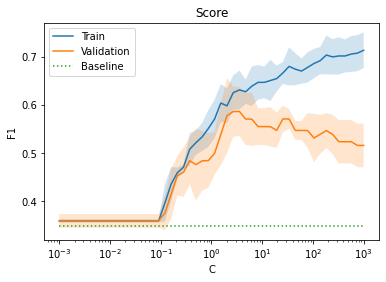

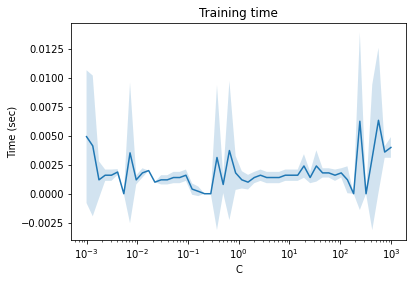

In [19]:
plot_grid_search(search, dummy_f1, 'C', xscale='log')

Training time = 0.0009975433349609375 sec
Accuracy = 0.5232558139534884
Precision = 0.5232558139534884
Recall = 0.5232558139534884
F1 = 0.5232558139534884
Train F1 = 0.609375


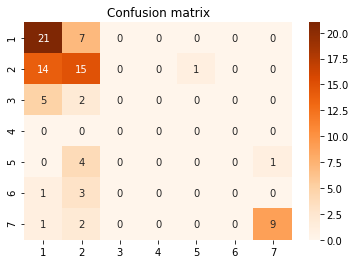

Example of correct classification (y_pred = 1, y_test = 1)
RI     1.5172
Na    13.3800
Mg     3.5000
Al     1.1500
Si    72.8500
K      0.5000
Ca     8.4300
Ba     0.0000
Fe     0.0000
Name: 24, dtype: float64

Example of misclassification (y_pred = 2, y_test = 5)
RI     1.52151
Na    11.03000
Mg     1.71000
Al     1.56000
Si    73.44000
K      0.58000
Ca    11.62000
Ba     0.00000
Fe     0.00000
Name: 166, dtype: float64


In [20]:
evaluate_model(search, 'Linear SVM')

#### 3.4 Polynomial SVM

Ακολουθεί βελτιστοποίηση του SVM classifier με polynomial kernel ως προς τις παραμέτρους C και degree. Το degree είναι ο βαθμός του πολυωνύμου.

Kernel: $ K(\mathbf{x}, \mathbf{x}') = (\gamma\langle\mathbf{x},\mathbf{x}'\rangle+r)^d $

In [21]:
model = svm.SVC(kernel='poly')
pipe = pipeline.Pipeline([('scaler', scaler), ('pca', pca), ('model', model)])

param_grid = {
    'model__C': np.logspace(-3, 3),
    'model__degree': np.arange(2, 5)
}

search = model_selection.GridSearchCV(pipe, param_grid, n_jobs=-1, scoring='f1_micro', return_train_score=True)
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

Best F1 = 0.6486153846153846
Best params = {'model__C': 33.9322177189533, 'model__degree': 2}


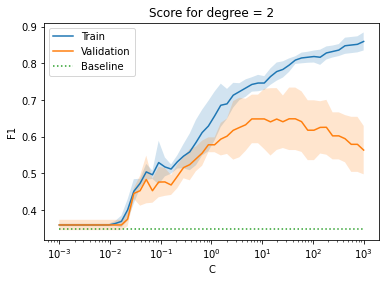

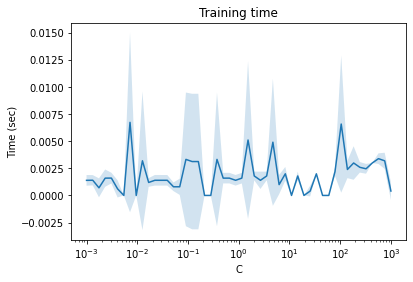

In [22]:
plot_grid_search(search, dummy_f1, 'C', param2='degree', xscale='log')

Training time = 0.0 sec
Accuracy = 0.5930232558139535
Precision = 0.5930232558139535
Recall = 0.5930232558139535
F1 = 0.5930232558139535
Train F1 = 0.765625


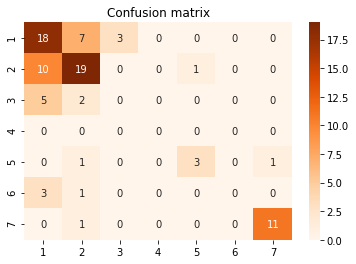

Example of correct classification (y_pred = 5, y_test = 5)
RI     1.52151
Na    11.03000
Mg     1.71000
Al     1.56000
Si    73.44000
K      0.58000
Ca    11.62000
Ba     0.00000
Fe     0.00000
Name: 166, dtype: float64

Example of misclassification (y_pred = 1, y_test = 3)
RI     1.51643
Na    12.16000
Mg     3.52000
Al     1.35000
Si    72.89000
K      0.57000
Ca     8.53000
Ba     0.00000
Fe     0.00000
Name: 149, dtype: float64


In [23]:
evaluate_model(search, 'Polynomial SVM')

#### 3.5 RBF SVM

Ακολουθεί βελτιστοποίηση του SVM classifier με rbf kernel ως προς τις παραμέτρους C και gamma. Το gamma δείχνει πόσο μακριά φτάνει η επιρροή ενός παραδείγματος.

Kernel: $ K(\mathbf{x}, \mathbf{x}') = e^{-\gamma||\mathbf{x}-\mathbf{x}'||^2} $

In [24]:
model = svm.SVC(kernel='rbf')
pipe = pipeline.Pipeline([('scaler', scaler), ('pca', pca), ('model', model)])

param_grid = {
    'model__C': np.logspace(-3, 3),
    'model__gamma': np.logspace(-3, 3)
}

search = model_selection.GridSearchCV(pipe, param_grid, n_jobs=-1, scoring='f1_micro', return_train_score=True)
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

Best F1 = 0.6953846153846154
Best params = {'model__C': 2.023589647725158, 'model__gamma': 10.985411419875572}


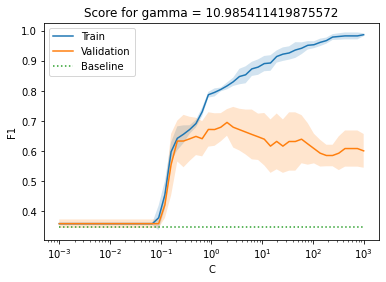

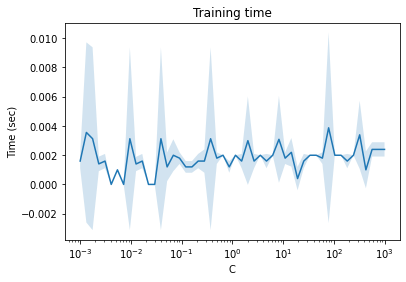

In [25]:
plot_grid_search(search, dummy_f1, 'C', param2='gamma', xscale='log')

Training time = 0.001970529556274414 sec
Accuracy = 0.6976744186046512
Precision = 0.6976744186046512
Recall = 0.6976744186046512
F1 = 0.6976744186046512
Train F1 = 0.8046875


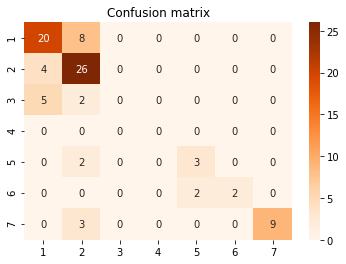

Example of correct classification (y_pred = 5, y_test = 5)
RI     1.52151
Na    11.03000
Mg     1.71000
Al     1.56000
Si    73.44000
K      0.58000
Ca    11.62000
Ba     0.00000
Fe     0.00000
Name: 166, dtype: float64

Example of misclassification (y_pred = 1, y_test = 3)
RI     1.51643
Na    12.16000
Mg     3.52000
Al     1.35000
Si    72.89000
K      0.57000
Ca     8.53000
Ba     0.00000
Fe     0.00000
Name: 149, dtype: float64


In [26]:
evaluate_model(search, 'RBF SVM')

#### 3.6 Sigmoid SVM

Ακολουθεί βελτιστοποίηση του SVM classifier με sigmoid kernel ως προς τις παραμέτρους C και gamma.

Kernel: $ K(\mathbf{x}, \mathbf{x}') = tanh(\gamma\langle\mathbf{x},\mathbf{x}'\rangle+r) $

In [27]:
model = svm.SVC(kernel='sigmoid')
pipe = pipeline.Pipeline([('scaler', scaler), ('pca', pca), ('model', model)])

param_grid = {
    'model__C': np.logspace(-3, 3),
    'model__gamma': np.logspace(-3, 3)
}

search = model_selection.GridSearchCV(pipe, param_grid, n_jobs=-1, scoring='f1_micro', return_train_score=True)
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

Best F1 = 0.6018461538461539
Best params = {'model__C': 8.286427728546842, 'model__gamma': 0.49417133613238334}


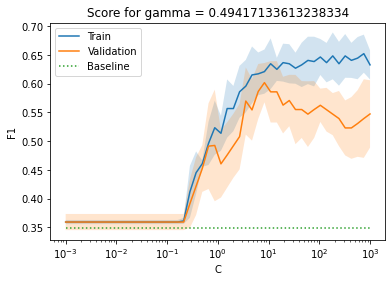

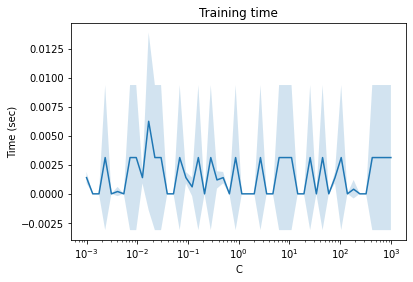

In [28]:
plot_grid_search(search, dummy_f1, 'C', param2='gamma', xscale='log')

Training time = 0.0019948482513427734 sec
Accuracy = 0.5232558139534884
Precision = 0.5232558139534884
Recall = 0.5232558139534884
F1 = 0.5232558139534884
Train F1 = 0.609375


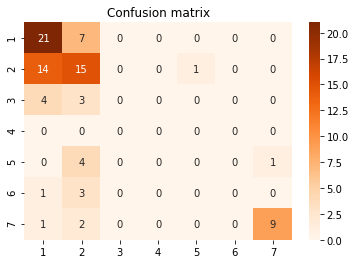

Example of correct classification (y_pred = 1, y_test = 1)
RI     1.5172
Na    13.3800
Mg     3.5000
Al     1.1500
Si    72.8500
K      0.5000
Ca     8.4300
Ba     0.0000
Fe     0.0000
Name: 24, dtype: float64

Example of misclassification (y_pred = 2, y_test = 5)
RI     1.52151
Na    11.03000
Mg     1.71000
Al     1.56000
Si    73.44000
K      0.58000
Ca    11.62000
Ba     0.00000
Fe     0.00000
Name: 166, dtype: float64


In [29]:
evaluate_model(search, 'Sigmoid SVM')

#### 3.7 Nearest Neighbors

Ακολουθεί βελτιστοποίηση του k-nearest neighbors classifier ως προς τις παραμέτρους n_neighbors και p. Στον πολυδιάστατο χώρο των χαρακτηριστικών οι k πλησιέστεροι γείτονες του κάθε δείγματος ψηφίζουν για να αποφασίσουν την κλάση στην οποία ανήκει. Για να βρεθούν οι πλησιέστεροι γείτονες χρησιμοποιείται η απόσταση minkowski:

$d_p(\mathbf{x}, \mathbf{y}) = \sqrt[p]{\sum_{i}(x_i-y_i)^p}$

In [30]:
from sklearn import neighbors

model = neighbors.KNeighborsClassifier()
pipe = pipeline.Pipeline([('scaler', scaler), ('pca', pca), ('model', model)])

param_grid = {
    'model__n_neighbors': np.arange(1, 20),
    'model__p': np.arange(1, 5)
}

search = model_selection.GridSearchCV(pipe, param_grid, n_jobs=-1, scoring='f1_micro', return_train_score=True)
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

Best F1 = 0.6566153846153846
Best params = {'model__n_neighbors': 11, 'model__p': 3}


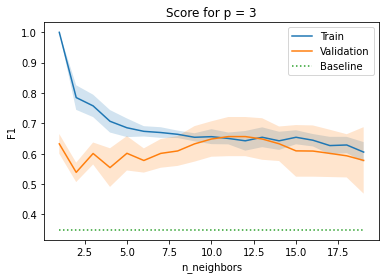

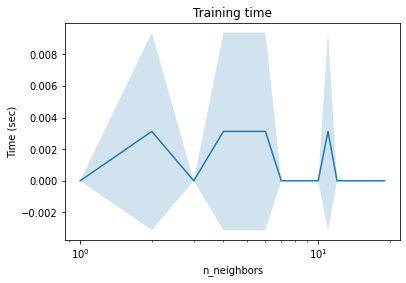

In [31]:
plot_grid_search(search, dummy_f1, 'n_neighbors', param2='p')

Training time = 0.015621423721313477 sec
Accuracy = 0.6744186046511628
Precision = 0.6744186046511628
Recall = 0.6744186046511628
F1 = 0.6744186046511628
Train F1 = 0.640625


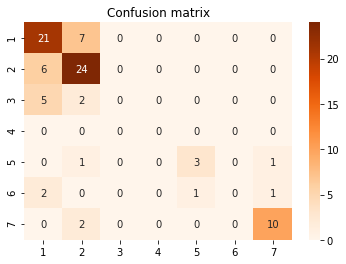

Example of correct classification (y_pred = 1, y_test = 1)
RI     1.5172
Na    13.3800
Mg     3.5000
Al     1.1500
Si    72.8500
K      0.5000
Ca     8.4300
Ba     0.0000
Fe     0.0000
Name: 24, dtype: float64

Example of misclassification (y_pred = 2, y_test = 5)
RI     1.52151
Na    11.03000
Mg     1.71000
Al     1.56000
Si    73.44000
K      0.58000
Ca    11.62000
Ba     0.00000
Fe     0.00000
Name: 166, dtype: float64


In [32]:
evaluate_model(search, 'Nearest Neighbors')

#### 3.8 Nearest Class Centroid

Κάθε κλάση στον Nearest Class Centroid classifier αντιπροσωπεύεται απο το centroid των μελών της.

In [33]:
model = neighbors.NearestCentroid()
pipe = pipeline.Pipeline([('scaler', scaler), ('pca', pca), ('model', model)])

param_grid = {
    'model__shrink_threshold': np.arange(0, 1.1, 0.01)
}

search = model_selection.GridSearchCV(pipe, param_grid, n_jobs=-1, scoring='f1_micro', return_train_score=True)
search.fit(x_train, y_train)

print('Best F1 =', search.best_score_)
print('Best params =', search.best_params_)

Best F1 = 0.5073846153846154
Best params = {'model__shrink_threshold': 0.64}


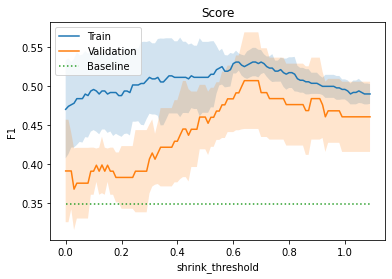

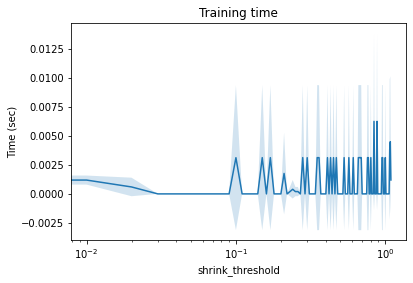

In [34]:
plot_grid_search(search, dummy_f1, 'shrink_threshold')

Training time = 0.0 sec
Accuracy = 0.5465116279069767
Precision = 0.5465116279069767
Recall = 0.5465116279069767
F1 = 0.5465116279069767
Train F1 = 0.5390625


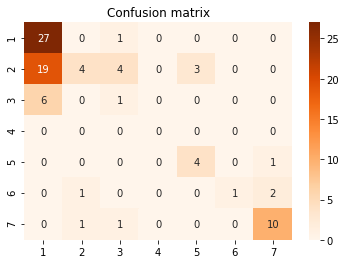

Example of correct classification (y_pred = 5, y_test = 5)
RI     1.52151
Na    11.03000
Mg     1.71000
Al     1.56000
Si    73.44000
K      0.58000
Ca    11.62000
Ba     0.00000
Fe     0.00000
Name: 166, dtype: float64

Example of misclassification (y_pred = 1, y_test = 2)
RI     1.51574
Na    14.86000
Mg     3.67000
Al     1.74000
Si    71.87000
K      0.16000
Ca     7.36000
Ba     0.00000
Fe     0.12000
Name: 70, dtype: float64


In [35]:
evaluate_model(search, 'Nearest Class Centroid')

#### 3.9 Σύνοψη αποτελεσμάτων

In [36]:
final_results_df = pd.DataFrame(final_results)
final_results_df = final_results_df.style.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])
final_results_df.set_properties(**{'text-align': 'left'}).hide_index()

Classifier,Parameters,Train F1,Test F1,Training Time (sec)
Dummy Classifier,strategy = 'most_frequent',0.3594,0.3488,0.0020
Linear SVM,C = 3.5565,0.6094,0.5233,0.0010
Polynomial SVM,"C = 33.9322, degree = 2",0.7656,0.5930,0.0000
RBF SVM,"C = 2.0236, gamma = 10.9854",0.8047,0.6977,0.0020
Sigmoid SVM,"C = 8.2864, gamma = 0.4942",0.6094,0.5233,0.0020
Nearest Neighbors,"n_neighbors = 11, p = 3",0.6406,0.6744,0.0156
Nearest Class Centroid,shrink_threshold = 0.6400,0.5391,0.5465,0.0000
